In [3]:
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import warnings
import time
from collections import Counter
warnings.filterwarnings("ignore")


plt.style.use("fivethirtyeight")

sns.set_style({'font.sans-serif': ['simsun', 'Arial']})
sns.set_style('darkgrid', {'font.sans-serif': ['simhei', 'Arial']})
%matplotlib inline
current_date = pd.to_datetime(
    time.strftime('%Y-%m-%d', time.localtime(time.time())))

res = {}
data_path = r'../../../Data/CompInfo/'
current_date

Timestamp('2019-04-02 00:00:00')

# 软著著作权

In [3]:
df_soft_bpk = pd.read_excel(data_path+r'软著著作权.xlsx')
df_soft = df_soft_bpk.copy()

In [4]:
df_soft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36858 entries, 0 to 36857
Data columns (total 4 columns):
企业编号           36858 non-null int64
软件全称           36858 non-null object
软件著作权版本号       30878 non-null object
软件著作权登记批准日期    36818 non-null object
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


In [154]:
new_df_soft = pd.DataFrame(df_soft['企业编号'].value_counts())
new_df_soft.columns = ['软著数量']
new_df_soft['企业编号'] = new_df_soft.index
new_df_soft.sort_values(by=['企业编号'], inplace=True)
new_df_soft = new_df_soft[['企业编号', '软著数量']]
new_df_soft = new_df_soft.set_index(np.arange(0, len(new_df_soft)))
res['软著著作权'] = new_df_soft

# 作品著作

In [155]:
df_zuopin_bpk = pd.read_excel(data_path+r'作品著作权.xlsx')
df_zuopin = df_zuopin_bpk.copy()

In [156]:
df_zuopin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33555 entries, 0 to 33554
Data columns (total 5 columns):
企业编号           33555 non-null int64
作品著作权类别        33379 non-null object
作品著作权登记日期      33178 non-null object
作品著作权创作完成日期    32177 non-null object
作品著作权首次发布日期    22118 non-null object
dtypes: int64(1), object(4)
memory usage: 1.3+ MB


In [157]:
df_zuopin = df_zuopin_bpk.copy()

In [158]:
new_df_zuopin = pd.DataFrame(df_zuopin['企业编号'].value_counts())
new_df_zuopin.columns = ['作品著作数量']
new_df_zuopin['企业编号'] = new_df_zuopin.index
new_df_zuopin.sort_values(by=['企业编号'], inplace=True)
new_df_zuopin = new_df_zuopin[['企业编号', '作品著作数量']]
new_df_zuopin = new_df_zuopin.set_index(np.arange(0, len(new_df_zuopin)))

In [159]:
# merge_zhuzuo_zuopin = (pd.merge(new_df_soft, new_df_zuopin,
#                                 on='企业编号', how='outer')).fillna(0).astype(int)
res['作品著作'] = new_df_zuopin

# 项目信息

In [160]:
df_project_bkp = pd.read_excel(data_path+r'项目信息.xlsx')
df_project = df_project_bkp.copy()

In [161]:
df_project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054 entries, 0 to 3053
Data columns (total 7 columns):
企业编号      3054 non-null int64
行业        170 non-null object
标签        3047 non-null object
企业规模      168 non-null object
运营状态      2934 non-null object
简介        3026 non-null object
项目成立时间    2876 non-null object
dtypes: int64(1), object(6)
memory usage: 167.1+ KB


In [162]:
df_project['运营状态'].value_counts()

运营中    2932
融资中       2
Name: 运营状态, dtype: int64

In [163]:
new_df_project = pd.DataFrame(
    df_project.loc[(df_project['运营状态'] == '运营中'), '企业编号'].value_counts())
new_df_project.columns = ['项目数量']
new_df_project['企业编号'] = new_df_project.index
new_df_project.sort_values(by=['企业编号'], inplace=True)
new_df_project = new_df_project[['企业编号', '项目数量']]
new_df_project = new_df_project.set_index(np.arange(0, len(new_df_project)))
# new_df_project.head(n=20)

In [164]:
# merge_zhuzuo_zuopin_project = (pd.merge(merge_zhuzuo_zuopin, new_df_project,
#                                         on='企业编号', how='outer')).fillna(0).astype(int)
res['项目信息'] = new_df_project

# 纳税A级年份

In [165]:
df_nashuiyear_bkp = pd.read_excel(data_path+r'纳税A级年份.xlsx')
df_nashuiyear = df_nashuiyear_bkp.copy()

In [166]:
df_nashuiyear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7927 entries, 0 to 7926
Data columns (total 2 columns):
企业编号      7927 non-null int64
纳税A级年份    7927 non-null int64
dtypes: int64(2)
memory usage: 123.9 KB


In [167]:
df_nashuiyear['纳税A级年份'].value_counts()

2016    2380
2017    1978
2015    1858
2014    1711
Name: 纳税A级年份, dtype: int64

In [168]:
new_df_nashuiyear = df_nashuiyear.groupby(['企业编号', '纳税A级年份'])[
    '纳税A级年份'].count().unstack()

new_df_nashuiyear['企业编号'] = new_df_nashuiyear.index
new_df_nashuiyear = new_df_nashuiyear[['企业编号', 2014, 2015, 2016, 2017]]
columns = {'企业编号': '企业编号', 2014: '纳税A级年份_2014', 2015: '纳税A级年份_2015',
           2016: '纳税A级年份_2016', 2017: '纳税A级年份_2017'}
columns = ['企业编号', '纳税A级年份_2014', '纳税A级年份_2015', '纳税A级年份_2016', '纳税A级年份_2017']
# new_df_nashuiyear.rename(columns, inplace=True)
new_df_nashuiyear.columns = columns
new_df_nashuiyear = new_df_nashuiyear.set_index(
    np.arange(0, len(new_df_nashuiyear))).fillna(0).astype(int)
# new_df_nashuiyear.head(n=5)

In [169]:
# merge_zhuzuo_zuopin_project_nashui = (pd.merge(merge_zhuzuo_zuopin_project, new_df_nashuiyear,
#                                                on='企业编号', how='outer')).fillna(0).astype(int)
res['纳税A级年份'] = new_df_nashuiyear

# 资质认证

In [170]:
df_zizhi_bkp = pd.read_excel(data_path+r'资质认证.xlsx')

In [171]:
df_zizhi = df_zizhi_bkp.copy()
df_zizhi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169898 entries, 0 to 169897
Data columns (total 5 columns):
企业编号       169898 non-null int64
证书名称       169898 non-null object
有效期起止日期    161662 non-null object
有效期截至日期    124035 non-null object
状态         148665 non-null object
dtypes: int64(1), object(4)
memory usage: 6.5+ MB


In [172]:
df_zizhi = df_zizhi_bkp.copy()
df_zizhi['状态'].value_counts()

有效           70917
已注销          28220
注销           15805
已撤销          12601
过期失效          9762
撤销            9719
暂停             580
已暂停            494
当前批件           238
已过期            212
延续              41
变更              23
正常              16
历史批件            14
旧版               7
注销(非申请)          5
新立               5
无效（依申请注销）        3
无效（逾期未换证）        2
证书注销             1
Name: 状态, dtype: int64

In [173]:
status = ['有效', '延续', '变更', '正常', '新立']
new_df_zizhi = df_zizhi.loc[(df_zizhi['有效期截至日期'].notnull())]
new_df_zizhi = new_df_zizhi.loc[(new_df_zizhi['状态'].notnull())]
new_df_zizhi['有效期截至日期'] = pd.to_datetime(new_df_zizhi['有效期截至日期'])


# new_df_zizhi = new_df_zizhi.loc[(new_df_zizhi['有效期截至日期'].notnull())]
# df_zizhi = df_zizhi.loc[(df_zizhi['状态 '] == '有效')]

In [174]:
new_df_zizhi = new_df_zizhi.loc[(new_df_zizhi['有效期截至日期'] > current_date)]
new_df_zizhi['状态'].value_counts()

有效      59065
已注销      3208
注销       2149
已撤销      1411
撤销       1136
已暂停       480
暂停        427
过期失效       47
延续         21
变更         18
正常         16
旧版          7
新立          4
证书注销        1
Name: 状态, dtype: int64

In [175]:
new_df_zizhi = new_df_zizhi.loc[(
    new_df_zizhi['状态'].str.contains('[有效|延续|变更|正常|新立]'))]
# new_df_zizhi.head(n=5)

In [176]:
new_df_zizhi_count = pd.DataFrame(new_df_zizhi['企业编号'].value_counts())
new_df_zizhi_count.columns = ['资质证书数量']
new_df_zizhi_count['企业编号'] = new_df_zizhi_count.index
new_df_zizhi_count.sort_values(by=['企业编号'], inplace=True)
# new_df_zizhi_count
new_df_zizhi_count = new_df_zizhi_count[['企业编号', '资质证书数量']]
new_df_zizhi_count = new_df_zizhi_count.set_index(
    np.arange(0, len(new_df_zizhi_count)))
new_df_zizhi_count.head(n=5)

,企业编号,资质证书数量
0,1001,9
1,1003,442
2,1004,1
3,1005,5
4,1006,6


In [177]:
# merge_zhuzuo_zuopin_project_nashui_zizhi = (pd.merge(merge_zhuzuo_zuopin_project_nashui, new_df_zizhi,
#                                                      on='企业编号', how='outer')).fillna(0).astype(int)
res['资质认证'] = new_df_zizhi

# 产品

In [178]:
df_product = pd.read_excel(data_path+r'产品.xlsx')
new_df_product = df_product.groupby(
    ['企业编号', '产品类型'])['产品类型'].count().unstack()

new_df_product['企业编号'] = new_df_product.index
columns = ['企业编号', 'android', 'ios', 'miniapp', 'website', 'wechat', 'weibo']
new_df_product = pd.DataFrame(new_df_product, columns=columns)
new_df_product = new_df_product.set_index(np.arange(0, len(new_df_product)))
# new_df_product.head(n=10)

In [179]:
# merge_zhuzuo_zuopin_project_nashui_zizhi_product = (pd.merge(merge_zhuzuo_zuopin_project_nashui_zizhi, new_df_product,
#                                                              on='企业编号', how='outer')).fillna(0).astype(int)
res['产品'] = new_df_product

# 专利

In [180]:
df_zhuanli = pd.read_excel(data_path+r'专利.xlsx')
df_zhuanli['专利类型'] = df_zhuanli['专利类型'].str.replace('更正', '', regex=True)

df_zhuanli['授权公告日'] = df_zhuanli['授权公告日'].str.replace(
    r'[^0-9\-]', '', regex=True)
df_zhuanli['申请日'] = df_zhuanli['申请日'].str.replace(r'[^0-9\-]', '', regex=True)

df_zhuanli['授权公告日'] = pd.to_datetime(df_zhuanli['授权公告日'])
df_zhuanli['申请日'] = pd.to_datetime(df_zhuanli['申请日'])

In [181]:
tmp1 = df_zhuanli.loc[(df_zhuanli['专利类型'] == '发明专利')]
tmp1 = tmp1.loc[(abs(tmp1['申请日'].sub(pd.to_datetime(
    time.strftime('%Y-%m-%d', time.localtime(time.time()))), axis=0).dt.days)/365) <= 20]

tmp2 = df_zhuanli.loc[(df_zhuanli['专利类型'] == '发明公布')]
tmp2 = tmp2.loc[(abs(tmp2['申请日'].sub(pd.to_datetime(
    time.strftime('%Y-%m-%d', time.localtime(time.time()))), axis=0).dt.days)/365) <= 20]

tmp3 = df_zhuanli.loc[(df_zhuanli['专利类型'] == '发明授权')]
tmp3 = tmp3.loc[(abs(tmp3['申请日'].sub(pd.to_datetime(
    time.strftime('%Y-%m-%d', time.localtime(time.time()))), axis=0).dt.days)/365) <= 20]

tmp4 = df_zhuanli.loc[(df_zhuanli['专利类型'] == '外观设计')]
tmp4 = tmp4.loc[(abs(tmp4['申请日'].sub(pd.to_datetime(
    time.strftime('%Y-%m-%d', time.localtime(time.time()))), axis=0).dt.days)/365) <= 10]

tmp5 = df_zhuanli.loc[(df_zhuanli['专利类型'] == '实用新型')]
tmp5 = tmp5.loc[(abs(tmp5['申请日'].sub(pd.to_datetime(
    time.strftime('%Y-%m-%d', time.localtime(time.time()))), axis=0).dt.days)/365) <= 10]

filter_df_zhuanli = pd.concat([tmp1, tmp2, tmp3, tmp4, tmp5])

In [182]:
filter_df_zhuanli = filter_df_zhuanli.drop(columns=['授权公告日', '申请日'])
new_df_zhuanli = filter_df_zhuanli.groupby(
    ['企业编号', '专利类型'])['专利类型'].count().unstack()
new_df_zhuanli['企业编号'] = new_df_zhuanli.index
columns = ['企业编号', '发明专利', '发明公布', '发明授权', '外观设计', '实用新型']
new_df_zhuanli = pd.DataFrame(new_df_zhuanli, columns=columns)
new_df_zhuanli = new_df_zhuanli.set_index(np.arange(0, len(new_df_zhuanli)))
# new_df_zhuanli.head(n=5)

In [183]:
# merge_zhuzuo_zuopin_project_nashui_zizhi_product_zhuanli = (pd.merge(merge_zhuzuo_zuopin_project_nashui_zizhi_product, new_df_zhuanli,
#                                                                      on='企业编号', how='outer')).fillna(0).astype(int)
res['专利'] = new_df_zhuanli

# 竞品

In [184]:
df_jingpin_bkp = pd.read_excel(data_path+r'竞品.xlsx')

In [185]:
df_jingpin = df_jingpin_bkp.copy()
df_jingpin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33883 entries, 0 to 33882
Data columns (total 7 columns):
企业编号      33883 non-null int64
竞品的行业     2076 non-null object
竞品的标签     33875 non-null object
竞品轮次      23416 non-null object
竞品详细地址    31384 non-null object
竞品运营状态    31002 non-null object
竞品成立时间    31561 non-null object
dtypes: int64(1), object(6)
memory usage: 1.8+ MB


In [186]:
df_jingpin = df_jingpin.loc[(df_jingpin['竞品运营状态'] == '运营中')]
df_jingpin = df_jingpin.loc[(df_jingpin['竞品的标签'].notnull())]

In [187]:
new_df_jingpin = pd.DataFrame(df_jingpin['企业编号'].value_counts())
new_df_jingpin.columns = ['竞品数量']
new_df_jingpin['企业编号'] = new_df_jingpin.index
new_df_jingpin.sort_values(by=['企业编号'], inplace=True)
new_df_jingpin = new_df_jingpin[['企业编号', '竞品数量']]
new_df_jingpin = new_df_jingpin.set_index(np.arange(0, len(new_df_jingpin)))
# new_df_jingpin.head(n=20)

In [188]:
# merge_zhuzuo_zuopin_project_nashui_zizhi_product_zhuanli_jingpin = (pd.merge(merge_zhuzuo_zuopin_project_nashui_zizhi_product_zhuanli, new_df_jingpin,
#                                                                              on='企业编号', how='outer')).fillna(0).astype(int)
res['竞品'] = new_df_jingpin

# 海关进出口信用

In [189]:
df_haiguan_bkp = pd.read_excel(data_path+r'海关进出口信用.xlsx')

In [190]:
df_haiguan = df_haiguan_bkp.copy()

In [191]:
df_haiguan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2609 entries, 0 to 2608
Data columns (total 6 columns):
企业编号      2609 non-null int64
经济区划      2608 non-null object
经营类别      2607 non-null object
海关注销标志    1774 non-null object
年报情况      2609 non-null object
信用等级      1355 non-null object
dtypes: int64(1), object(5)
memory usage: 122.4+ KB


In [192]:
df_haiguan['经营类别'].value_counts()

进出口收发货人       2571
加工生产企业          20
报关企业             6
保税仓库             5
临时注册企业           3
0000000001       1
进出口运输工具负责人       1
Name: 经营类别, dtype: int64

In [193]:
df_haiguan['信用等级'].value_counts()

一般信用企业    913
一般认证企业    318
高级认证企业    123
失信企业        1
Name: 信用等级, dtype: int64

# 招投标

In [194]:
df_zhaotoubiao_bkp = pd.read_excel(data_path+r'招投标.xlsx')
df_zhaotoubiao = df_zhaotoubiao_bkp.copy()
df_zhaotoubiao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158309 entries, 0 to 158308
Data columns (total 5 columns):
企业编号     158309 non-null int64
公告类型     146194 non-null object
中标或招标    158309 non-null object
省份       158309 non-null object
发布时间     158309 non-null object
dtypes: int64(1), object(4)
memory usage: 6.0+ MB


In [195]:
df_zhaotoubiao['中标或招标'].value_counts()

中标    139286
招标     19023
Name: 中标或招标, dtype: int64

In [196]:
df_zhaotoubiao['公告类型'].value_counts()

中标       110781
成交        17653
合同        11509
预告         2777
其它         1233
招标          984
废标          559
单一          210
流标          188
变更          145
询价           85
竞谈           23
拟建           18
验收           15
结果变更          8
公开招标          2
违规            1
竞争性谈判         1
其他            1
竞价            1
Name: 公告类型, dtype: int64

In [197]:
new_df_zhaotoubiao = df_zhaotoubiao.groupby(
    ['企业编号', '中标或招标'])['中标或招标'].count().unstack()


new_df_zhaotoubiao['企业编号'] = new_df_zhaotoubiao.index
new_df_zhaotoubiao = new_df_zhaotoubiao[['企业编号', '中标', '招标']]
new_df_zhaotoubiao = new_df_zhaotoubiao.set_index(
    np.arange(0, len(new_df_zhaotoubiao)))
new_df_zhaotoubiao = new_df_zhaotoubiao.drop(['招标'], axis=1)
new_df_zhaotoubiao.head(n=5)

中标或招标,企业编号,中标
0,1001,74.0
1,1002,8.0
2,1003,17.0
3,1004,NaN
4,1005,46.0


In [198]:
# merge_zhaotuobiao = (pd.merge(merge_zhuzuo_zuopin_project_nashui_zizhi_product_zhuanli_jingpin, new_df_zhaotoubiao,
#                               on='企业编号', how='outer')).fillna(0)
res['招投标'] = new_df_zhaotoubiao

# 购地

In [199]:
df_goudi1_bkp = pd.read_excel(data_path+'购地-地块公示.xlsx')
df_goudi2_bkp = pd.read_excel(data_path+'购地-市场交易-土地转让.xlsx')
df_goudi3_bkp = pd.read_excel(data_path+'购地-房地产大企业购地情况.xlsx')
df_goudi4_bkp = pd.read_excel(data_path+'购地-房地产大地块出让情况.xlsx')
df_goudi5_bkp = pd.read_excel(data_path+'购地-市场交易-土地抵押.xlsx')
df_goudi6_bkp = pd.read_excel(data_path+'购地-结果公告.xlsx')
df_goudi1 = df_goudi1_bkp.copy()
df_goudi2 = df_goudi2_bkp.copy()
df_goudi3 = df_goudi3_bkp.copy()
df_goudi4 = df_goudi4_bkp.copy()
df_goudi5 = df_goudi5_bkp.copy()
df_goudi6 = df_goudi6_bkp.copy()
print(df_goudi1.info(), '\n地块公示')
print('=================')
print(df_goudi3.info(), '\n房地产大企业购地情况')
print('=================')
print(df_goudi2.info(), '\n市场交易-土地转让')
print('=================')
print(df_goudi4.info(), '\n房地产大地块出让情况')
print('=================')
print(df_goudi5.info(), '\n市场交易-土地抵押')
print('=================')
print(df_goudi6.info(), '\n结果公告')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20033 entries, 0 to 20032
Data columns (total 9 columns):
企业编号        20033 non-null int64
行政区         19993 non-null object
时间          20033 non-null object
公示日期        5046 non-null object
土地用途        20027 non-null object
土地面积（公顷）    20033 non-null float64
出让年限        3970 non-null object
成交价（万元）     4894 non-null float64
土地使用条件      2032 non-null object
dtypes: float64(2), int64(1), object(6)
memory usage: 1.4+ MB
None 
地块公示
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20033 entries, 0 to 20032
Data columns (total 11 columns):
企业编号         20033 non-null int64
行政区          19993 non-null object
签订日期         20033 non-null object
供地总面积（公顷）    20033 non-null float64
约定动工时间       1084 non-null object
土地用途         20027 non-null object
供应方式         1032 non-null object
最小容积率        513 non-null float64
最大容积率        517 non-null float64
成交价款（万元）     4894 non-null float64
约定竣工时间       631 non-null object
dtypes: float64(4), int64(1)

In [200]:
print('地块公示 vs 房地产大企业购地情况:', df_goudi1['土地面积（公顷）'].equals(
    df_goudi3['供地总面积（公顷）']), df_goudi1['企业编号'].equals(
    df_goudi3['企业编号']))
print('市场交易-土地转让 vs 房地产大地块出让情况:',
      df_goudi2['土地面积(公顷)'].equals(df_goudi4['供地总面积']), df_goudi2['企业编号'].equals(df_goudi4['企业编号']))
print('市场交易-土地转让 vs 市场交易-土地抵押:',
      df_goudi2['土地面积(公顷)'].equals(df_goudi5['抵押面积(公顷)']), df_goudi2['企业编号'].equals(df_goudi5['企业编号']))
print('市场交易-土地转让 vs 结果公告:', df_goudi2['土地面积(公顷)'].equals(
    df_goudi6['总面积']), df_goudi2['企业编号'].equals(df_goudi6['企业编号']))

地块公示 vs 房地产大企业购地情况: True True
市场交易-土地转让 vs 房地产大地块出让情况: True True
市场交易-土地转让 vs 市场交易-土地抵押: False True
市场交易-土地转让 vs 结果公告: True True


In [201]:
df_goudi1['土地面积（公顷）'] = df_goudi1['土地面积（公顷）'].astype(float)
goudi_grouped = df_goudi1.groupby(['企业编号'])

agg_goudi_func = {
    '土地面积（公顷）': ['sum', 'min', 'max']
}
goudi_grouped_info = goudi_grouped.agg(agg_goudi_func)
goudi_grouped_info.columns = [
    '_'.join(col).strip() for col in goudi_grouped_info.columns.values]
goudi_grouped_info['企业编号'] = goudi_grouped_info.index
goudi_grouped_info = goudi_grouped_info.set_index(
    np.arange(0, len(goudi_grouped_info)))
goudi_grouped_info.head(n=3)
# drop goudi3

,土地面积（公顷）_sum,土地面积（公顷）_min,土地面积（公顷）_max,企业编号
0,158135.998846,0.00030,80001.80000,1001
1,55.668100,4.15927,41.40896,1003
2,4.000000,0.60000,3.40000,1004


In [202]:
df_jine = df_goudi5.loc[(df_goudi5['评估金额(万元)'].notnull())]

df_jine['评估金额(亿元)'] = df_jine['评估金额(万元)'].astype(float)/10000
goudi_grouped_jine = df_jine.groupby(['企业编号'])

agg_goudi_func = {
    '评估金额(亿元)': ['sum', 'max']
}
goudi_grouped_jine_info = goudi_grouped_jine.agg(agg_goudi_func)
goudi_grouped_jine_info.columns = [
    '_'.join(col).strip() for col in goudi_grouped_jine_info.columns.values]
goudi_grouped_jine_info['企业编号'] = goudi_grouped_jine_info.index
goudi_grouped_jine_info = goudi_grouped_jine_info.set_index(
    np.arange(0, len(goudi_grouped_jine_info)))
goudi_grouped_jine_info.head(n=3)

,评估金额(亿元)_sum,评估金额(亿元)_max,企业编号
0,54454.534553,16793.953500,1001
1,1072.827287,304.009500,1010
2,1831.685186,40.403526,1011


In [203]:
merge_goudi = goudi_grouped_info.merge(
    goudi_grouped_jine_info, how='outer', on='企业编号')
merge_goudi['土地面积评估均值(公顷/亿元)'] = (merge_goudi['土地面积（公顷）_sum'] /
                                  merge_goudi['评估金额(亿元)_sum']).replace(np.inf, np.nan)
cols = ['企业编号', '土地面积（公顷）_sum', '土地面积（公顷）_min', '土地面积（公顷）_max',
        '评估金额(亿元)_sum', '评估金额(亿元)_max', '土地面积评估均值(公顷/亿元)']
merge_goudi = merge_goudi[cols]

diyacishu = pd.DataFrame()
diyacishu['抵押次数'] = df_goudi5.loc[(df_goudi5['评估金额(万元)'].notnull())].groupby(['企业编号'])[
    '企业编号'].count()

goudicishu = pd.DataFrame()
goudicishu['购地次数'] = df_goudi1.loc[(df_goudi1['土地面积（公顷）'].notnull())].groupby(['企业编号'])[
    '企业编号'].count()
goudicishu = goudicishu.merge(
    diyacishu, how='outer', on='企业编号')
merge_goudi = merge_goudi.merge(goudicishu, how='outer', on='企业编号')
merge_goudi.columns = ['企业编号', '企业购地面积（公顷）_sum', '企业购地面积（公顷）_min', '企业购地面积（公顷）_max',
                       '土地评估金额(亿元)_sum', '土地评估金额(亿元)_max', '土地面积评估均值(公顷/亿元)', '购地次数', '抵押次数']
merge_goudi.head(n=5)

,企业编号,企业购地面积（公顷）_sum,企业购地面积（公顷）_min,企业购地面积（公顷）_max,土地评估金额(亿元)_sum,土地评估金额(亿元)_max,土地面积评估均值(公顷/亿元),购地次数,抵押次数
0,1001,158135.998846,0.00030,80001.80000,54454.534553,16793.9535,2.904001,1671.0,1528.0
1,1003,55.668100,4.15927,41.40896,NaN,NaN,NaN,3.0,NaN
2,1004,4.000000,0.60000,3.40000,NaN,NaN,NaN,2.0,NaN
3,1005,2.935250,2.93525,2.93525,NaN,NaN,NaN,1.0,NaN
4,1007,230.110791,30.49280,66.66667,NaN,NaN,NaN,4.0,NaN


In [204]:
merge_goudi.info()
# df_goudi5_bkp['企业编号'].value_counts()
df_goudi5_bkp.loc[(df_goudi5_bkp['评估金额(万元)'].notnull())]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1317 entries, 0 to 1316
Data columns (total 9 columns):
企业编号               1317 non-null int64
企业购地面积（公顷）_sum     1316 non-null float64
企业购地面积（公顷）_min     1316 non-null float64
企业购地面积（公顷）_max     1316 non-null float64
土地评估金额(亿元)_sum     216 non-null float64
土地评估金额(亿元)_max     216 non-null float64
土地面积评估均值(公顷/亿元)    211 non-null float64
购地次数               1316 non-null float64
抵押次数               216 non-null float64
dtypes: float64(8), int64(1)
memory usage: 102.9 KB


,企业编号,土地抵押人性质,抵押面积(公顷),土地用途,抵押土地用途,抵押土地权属性质与使用权类型,土地面积,评估金额(万元),抵押金额(万元),土地抵押登记起始时间,土地抵押登记结束时间
7,1001,有限公司,10.8261,工业用地,工业用地,国有出让,10.8261,2921.0000,1200.0000,2007-06-25 14:39:37,2008-06-25 14:39:37
8,1001,有限公司,3.2054,工业用地,工业用地,国有出让,3.2054,847.6500,400.0000,2007-08-17 14:48:15,2009-04-23 14:48:15
9,1001,企业,6.5283,住宅用地,住宅用地,国有,6.5283,9990.9100,4995.4550,2008-01-11 20:26:58,2011-12-11 20:26:58
10,1001,NaN,3.8533,其他普通商品住房用地,其他普通商品住房用地,出让地,3.8533,19386.0000,2516.0000,2008-04-03 11:14:03,2010-10-26 11:14:03
11,1001,股份制,3.7990,工矿仓储用地,工矿仓储用地,出让,3.7990,11049.0000,8850.0000,2008-04-25 09:35:17,2009-09-30 09:35:17
12,1001,股份制,2.6640,工业用地,工业用地,国有,2.6640,858.6100,429.3500,2008-07-24 16:54:48,2011-07-24 16:54:48
13,1001,有限公司,2.6911,工业用地,工业用地,国有出让,2.6911,2871.0000,1000.0000,2008-07-28 15:16:34,2010-07-29 15:16:34
14,1001,有限公司,1.0826,工业用地,工业用地,国有出让,1.0826,3172.0000,1500.0000,2008-07-29 15:17:11,2010-07-29 15:17:11
15,1001,NaN,0.1758,住宅用地,住宅用地,NaN,0.1758,282.0000,160.0000,2008-09-16 08:36:26,2011-09-16 08:36:26
16,1001,NaN,0.4633,住宅用地,住宅用地,NaN,0.4633,744.0000,410.0000,2008-09-16 10:45:23,2011-09-16 10:45:23


In [205]:
res['企业购地'] = merge_goudi

# 年报-对外投资信息

In [206]:
df_nianbao_touzi_bkp = pd.read_excel(data_path+r'年报-对外投资信息.xlsx')
df_nianbao_touzi = df_nianbao_touzi_bkp.copy()
df_nianbao_touzi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93369 entries, 0 to 93368
Data columns (total 4 columns):
企业编号    93369 non-null int64
投资金额    1456 non-null float64
投资占比    1456 non-null float64
年报年份    93367 non-null float64
dtypes: float64(3), int64(1)
memory usage: 2.8 MB


In [207]:
df_nianbao_touzi_clean = df_nianbao_touzi.loc[(
    df_nianbao_touzi['投资金额'].notnull())]

agg_func = {
    '投资金额': ['sum', 'min', 'max'],
    '企业编号': ['count']
}
df_nianbao_touzi_group = df_nianbao_touzi_clean.groupby(
    ['企业编号']).agg(agg_func)
df_nianbao_touzi_group.columns = [
    '_'.join(col).strip() for col in df_nianbao_touzi_group.columns.values]
df_nianbao_touzi_group['企业编号'] = df_nianbao_touzi_group.index
df_nianbao_touzi_group.rename(columns={'企业编号_count': '投资次数'}, inplace=True)
df_nianbao_touzi_group.head(n=2)

,投资金额_sum,投资金额_min,投资金额_max,投资次数,企业编号
企业编号,,,,,
1028,3703345.70,11600.0,3208193.70,7,1028
1134,170384.71,3.0,25505.71,56,1134


In [208]:
res['年报-对外投资信息'] = df_nianbao_touzi_group

# 年报-股东股权转让

In [209]:
df_nianbao_gudongguquanzhuanrang_bkp = pd.read_excel(
    data_path+r'年报-股东股权转让.xlsx')

In [210]:
df_nianbao_gudongguquanzhuanrang = df_nianbao_gudongguquanzhuanrang_bkp.copy()
df_nianbao_gudongguquanzhuanrang.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6855 entries, 0 to 6854
Data columns (total 5 columns):
企业编号       6855 non-null int64
变更前股权比例    5010 non-null object
变更后股权比例    5015 non-null object
股权变更日期     5022 non-null object
年报年份       6849 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 267.9+ KB


In [211]:
df_nianbao_gudongguquanzhuanrang['变更前股权比例'] = df_nianbao_gudongguquanzhuanrang['变更前股权比例'].str.rstrip(
    '%').astype(float)
df_nianbao_gudongguquanzhuanrang_clean = df_nianbao_gudongguquanzhuanrang.loc[(
    df_nianbao_gudongguquanzhuanrang['变更后股权比例'].notnull())]
df_nianbao_gudongguquanzhuanrang_clean['变更后股权比例'] = df_nianbao_gudongguquanzhuanrang_clean[~df_nianbao_gudongguquanzhuanrang_clean["变更后股权比例"].str.contains(
    '-')]['变更后股权比例'].str.rstrip('%').astype(float)

df_nianbao_gudongguquanzhuanrang_clean['变更股权比例差'] = df_nianbao_gudongguquanzhuanrang_clean['变更后股权比例'] - \
    df_nianbao_gudongguquanzhuanrang_clean['变更前股权比例']
# df_nianbao_gudongguquanzhuanrang_clean.head(n=3)
agg_func = {
    '变更股权比例差': ['sum', 'max', 'min'],
    '变更前股权比例': ['sum'],
    '变更后股权比例': ['sum'],
    '企业编号': ['count']
}
df_nianbao_gudongguquanzhuanrang_clean_new = df_nianbao_gudongguquanzhuanrang_clean.groupby([
                                                                                            '企业编号']).agg(agg_func)
df_nianbao_gudongguquanzhuanrang_clean_new.columns = [
    '_'.join(col) for col in df_nianbao_gudongguquanzhuanrang_clean_new.columns.values]
df_nianbao_gudongguquanzhuanrang_clean_new.columns = [
    '变更股权比例差_sum', '变更股权比例差_max', '变更股权比例差_min', '变更前股权比例_sum', '变更后股权比例_sum', '变更次数']
df_nianbao_gudongguquanzhuanrang_clean_new['企业编号'] = df_nianbao_gudongguquanzhuanrang_clean_new.index
df_nianbao_gudongguquanzhuanrang_clean_new.head(n=3)

,变更股权比例差_sum,变更股权比例差_max,变更股权比例差_min,变更前股权比例_sum,变更后股权比例_sum,变更次数,企业编号
企业编号,,,,,,,
1001,5.24,2.60,-0.80,90.35,95.59,11,1001
1002,-10.91,-10.91,-10.91,61.96,51.05,1,1002
1013,-13.89,1.11,-15.00,43.90,30.01,2,1013


In [212]:
res['年报-股东股权转让'] = df_nianbao_gudongguquanzhuanrang_clean_new

# 工商基本信息表

In [213]:
df_gongshangxinxi_bkp = pd.read_excel(data_path+r'工商基本信息表.xlsx')

In [214]:
df_gongshangxinxi = df_gongshangxinxi_bkp.copy()
df_gongshangxinxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 19 columns):
企业编号          3000 non-null int64
注册资本（万元）      3000 non-null float64
注册资本币种(正则)    3000 non-null object
成立日期          3000 non-null object
经营状态          3000 non-null object
行业大类（代码）      2999 non-null object
行业小类（代码）      2999 non-null object
类型            3000 non-null object
省份代码          3000 non-null int64
城市代码          3000 non-null int64
地区代码          3000 non-null int64
是否上市          3000 non-null object
经营期限自         2987 non-null object
经营期限至         521 non-null object
登记机关区域代码      2992 non-null float64
发照日期          2979 non-null object
员工人数          2986 non-null float64
注销原因          227 non-null object
注销时间          1 non-null object
dtypes: float64(3), int64(4), object(12)
memory usage: 445.4+ KB


In [215]:
df_gongshangxinxi['经营状态'].value_counts()

存续（在营、开业、在册）    1762
在营（开业）企业         401
存续               362
开业               343
在业                63
存续(在营、开业、在册)      48
迁出                21
Name: 经营状态, dtype: int64

In [216]:
df_gongshangxinxi['经营状态'] = df_gongshangxinxi['经营状态'].str.replace(
    '存续（在营、开业、在册）', '开业')
df_gongshangxinxi['经营状态'] = df_gongshangxinxi['经营状态'].str.replace(
    '在业', '开业')
df_gongshangxinxi['经营状态'] = df_gongshangxinxi['经营状态'].str.replace(
    '在营（开业）企业', '开业')
df_gongshangxinxi['经营状态'].value_counts()

开业              2569
存续               362
存续(在营、开业、在册)      48
迁出                21
Name: 经营状态, dtype: int64

In [217]:
zhuangtai = df_gongshangxinxi.groupby(['企业编号', '经营状态'])[
    '经营状态'].count().unstack().fillna(0).astype(int)
zhuangtai['企业编号'] = zhuangtai.index
zhuangtai['开业'] = zhuangtai['存续']+zhuangtai['存续(在营、开业、在册)']+zhuangtai['开业']
zhuangtai = pd.DataFrame(
    {'企业编号': zhuangtai['企业编号'], '经营状态_开业': zhuangtai['开业'], '经营状态_迁出': zhuangtai['迁出']})
res['经营状态'] = zhuangtai

In [218]:
df_hangye = df_gongshangxinxi.groupby(['企业编号', '行业大类（代码）'])[
    '行业大类（代码）'].count().unstack().fillna(0).astype(int)
df_hangye.columns = ['行业大类_'+col for col in df_hangye.columns.values]
df_hangye['企业编号'] = df_hangye.index
res['行业大类'] = df_hangye

In [219]:
df_gongshangxinxi['是否上市'] = df_gongshangxinxi['是否上市'].str.replace('Y', '1')
df_gongshangxinxi['是否上市'] = df_gongshangxinxi['是否上市'].str.replace('N', '0')
df_gongshangxinxi['是否上市'] = df_gongshangxinxi['是否上市'].astype(int)

In [220]:
df_gongshangxinxi.loc[df_gongshangxinxi['注册资本币种(正则)'] == '美元', [
    '注册资本（万元）']] = df_gongshangxinxi.loc[df_gongshangxinxi['注册资本币种(正则)'] == '美元', ['注册资本（万元）']]*8.2777
df_gongshangxinxi.loc[df_gongshangxinxi['注册资本币种(正则)'] == '美元']

,企业编号,注册资本（万元）,注册资本币种(正则),成立日期,经营状态,行业大类（代码）,行业小类（代码）,类型,省份代码,城市代码,地区代码,是否上市,经营期限自,经营期限至,登记机关区域代码,发照日期,员工人数,注销原因,注销时间
1309,2310,17.429525,美元,2000-05-15,开业,C,29,外企,44,4406,440600,1,2000-05-15,2015-05-14,440600.0,2008-05-19,14.0,NaN,NaN


In [221]:
temp = pd.DataFrame({'企业编号': df_gongshangxinxi['企业编号'],
                     '注册资本（万元）': df_gongshangxinxi['注册资本（万元）'],
                     '是否上市': df_gongshangxinxi['是否上市']})
res['merge_注册资本_是否上市'] = temp

In [222]:
df_gongshangxinxi['成立日期'] = pd.to_datetime(df_gongshangxinxi['成立日期'])
df_gongshangxinxi['成立年数'] = round(abs(df_gongshangxinxi['成立日期'].sub(
    current_date, axis=0).dt.days)/365).astype(int)
df_gongshangxinxi.head(n=3)

,企业编号,注册资本（万元）,注册资本币种(正则),成立日期,经营状态,行业大类（代码）,行业小类（代码）,类型,省份代码,城市代码,地区代码,是否上市,经营期限自,经营期限至,登记机关区域代码,发照日期,员工人数,注销原因,注销时间,成立年数
0,1001,746.138857,人民币,1992-10-19,开业,J,66,民营,31,3100,310000,1,1992-10-19,NaN,310100.0,1992-10-19,19.0,NaN,NaN,26
1,1002,82.772800,人民币,2000-09-19,开业,O,80,民营,44,4400,440000,1,2000-09-19,NaN,440000.0,2017-12-21,12.0,NaN,NaN,19
2,1003,80.000000,人民币,1999-07-21,开业,C,36,民营,42,4200,420000,1,1999-07-21,NaN,420000.0,2018-10-22,11.0,NaN,NaN,20


In [223]:
df_gongshangxinxi['是否注销'] = df_gongshangxinxi['注销原因'].fillna(0)
df_gongshangxinxi.loc[(df_gongshangxinxi['注销原因'].notnull()), '是否注销'] = 1

In [224]:
waiqi = df_gongshangxinxi.groupby(['企业编号', '类型'])[
    '类型'].count().unstack().fillna(0).astype(int)
waiqi['企业编号'] = waiqi.index
res['merge_成立年数_是否注销_是否外企'] = pd.DataFrame({
    '是否注销': df_gongshangxinxi['是否注销'],
    '是否外企': waiqi['外企'],
    '企业编号': waiqi['企业编号'],
    '成立年数': df_gongshangxinxi['成立年数']
})

# 年报企业基本信息

In [225]:
df_qiyejiben_bkp = pd.read_excel(data_path+r'年报-企业基本信息.xlsx')

In [226]:
df_qiyejiben = df_qiyejiben_bkp.copy()
df_qiyejiben.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15056 entries, 0 to 15055
Data columns (total 10 columns):
企业编号                  15056 non-null int64
注册资本                  1750 non-null object
企业经营状态                14837 non-null object
从业人数                  14838 non-null object
是否有网站或网点              14838 non-null object
企业是否有投资信息或购买其他公司股权    14835 non-null object
有限责任公司本年度是否发生股东股权转    14836 non-null object
是否提供对外担保              14827 non-null object
发布日期                  15039 non-null object
年报年份                  15048 non-null float64
dtypes: float64(1), int64(1), object(8)
memory usage: 1.1+ MB


In [227]:
df_qiyejiben['企业经营状态'].value_counts()

开业         13590
正常开业         739
开业/正常经营      420
存续            64
其他            10
歇业             7
清算             6
停业             1
Name: 企业经营状态, dtype: int64

In [228]:
jingyingzhaungtai = df_qiyejiben.groupby(['企业编号', '企业经营状态'])[
    '企业经营状态'].count().unstack().fillna(0).astype(int)
jingyingzhaungtai['企业编号'] = jingyingzhaungtai.index
jingyingzhaungtai['开业'] = jingyingzhaungtai['开业'] + \
    jingyingzhaungtai['开业/正常经营'] + \
    jingyingzhaungtai['正常开业']+jingyingzhaungtai['存续']
res['企业基本信息经营状态'] = pd.DataFrame({
    '企业编号': jingyingzhaungtai['企业编号'],
    '停业': jingyingzhaungtai['停业'],
    '其他': jingyingzhaungtai['其他'],
    '开业': jingyingzhaungtai['开业'],
    '歇业': jingyingzhaungtai['歇业'],
    '清算': jingyingzhaungtai['清算'],
})

# 年报-的对外提供保证担保信息

In [229]:
df_duiwaidanbao_bkp = pd.read_excel(data_path+r'年报-的对外提供保证担保信息.xlsx')

In [230]:
df_duiwaidanbao = df_duiwaidanbao_bkp.copy()
df_duiwaidanbao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10875 entries, 0 to 10874
Data columns (total 8 columns):
企业编号       10875 non-null int64
主债权数额      8777 non-null object
保证担保的范围    594 non-null object
保证的期间      8751 non-null object
保证的方式      8754 non-null object
主债权种类      8746 non-null object
履行债务的期限    10864 non-null object
年报年份       10875 non-null int64
dtypes: int64(2), object(6)
memory usage: 679.8+ KB


In [231]:
tmpdf = pd.DataFrame()
tmpdf['担保次数'] = df_duiwaidanbao.groupby(['企业编号'])['企业编号'].count()
tmpdf['企业编号'] = tmpdf.index
res['企业担保次数'] = tmpdf

# 年报-网站或网点信息

In [232]:
df_wangzhan_bkp = pd.read_excel(data_path+r'年报-网站或网点信息.xlsx')

In [233]:
df_wangzhan = df_wangzhan_bkp.copy()
df_wangzhan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13553 entries, 0 to 13552
Data columns (total 2 columns):
企业编号    13553 non-null int64
年报年份    13546 non-null float64
dtypes: float64(1), int64(1)
memory usage: 211.8 KB


In [234]:
tmpdf = pd.DataFrame()
tmpdf['网站或网点数'] = df_wangzhan.groupby(['企业编号'])['企业编号'].count()
tmpdf['企业编号'] = tmpdf.index
res['网站或网点数'] = tmpdf

# 商标

In [235]:
df_shangbiao_bkp = pd.read_excel(data_path+r'商标.xlsx')

In [236]:
df_shangbiao = df_shangbiao_bkp.copy()
df_shangbiao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345417 entries, 0 to 345416
Data columns (total 6 columns):
企业编号         345417 non-null int64
商标状态         343755 non-null object
申请日期         343433 non-null object
专用权期限开始日期    0 non-null float64
专用权期限结束日期    226554 non-null object
商标使用期限时间段    340948 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 15.8+ MB


In [237]:
df_shangbiao_withdate = df_shangbiao.loc[(df_shangbiao['专用权期限结束日期'].notnull())]
df_shangbiao_withdate['专用权期限结束日期'] = pd.to_datetime(
    df_shangbiao_withdate['专用权期限结束日期'])
df_shangbiao_withdate = df_shangbiao_withdate.loc[(
    df_shangbiao_withdate['专用权期限结束日期']) > current_date]
df_shangbiao_withdate['商标状态'].value_counts()

商标已注册                       42916
注册                          22874
商标注册申请完成                    22085
商标续展完成                      19072
商标变更完成                      14789
核准证明打印发送                    14106
变更商标申请人/注册人名义/地址完成           8903
等待受理通知书发文                    8220
等待受理通知发文                     7862
商标注册申请注册公告排版完成               6928
出具商标注册证明完成                   4775
商标转让完成                       4651
商标转让中                        2886
申请收文                         2311
商标续展中                        1830
变更商标申请人/注册人名义/地址中            1723
等待打印受理通知书                    1647
开具注册证明完成                     1621
等待打印注册证                      1561
等待注册公告公示期                    1378
商标无效                         1269
驳回复审注册公告排版完成                 1256
等待注册发文                        965
等待实质审查                        921
等待实审裁文发文                      757
商标注册申请等待受理中                   732
商标注册申请等待驳回复审                  709
商标使用许可备案完成                    708
核准通知打印发送                      661
排版注册公告        

In [238]:
finished = ['商标已注册',
            '注册',
            '商标注册申请完成',
            '商标续展完成',
            '商标变更完成',
            '变更商标申请人/注册人名义/地址完成',
            '商标注册申请注册公告排版完成',
            '商标转让完成',
            '出具商标注册证明完成']
df_shangbiao_withdate_clean = df_shangbiao_withdate.loc[(
    df_shangbiao_withdate['商标状态'].isin(finished))]
df_shangbiao_count = pd.DataFrame()
df_shangbiao_count['商标数量'] = df_shangbiao_withdate_clean.groupby(['企业编号'])[
    '企业编号'].count()
df_shangbiao_count['企业编号'] = df_shangbiao_count.index
df_shangbiao_count = df_shangbiao_count.set_index(
    np.arange(0, len(df_shangbiao_count)))
df_shangbiao_count.head(n=5)

,商标数量,企业编号
0,256,1001
1,5,1002
2,90,1003
3,6,1004
4,17,1005


In [239]:
res['商标数量'] = df_shangbiao_count

# 债券信息

In [240]:
df_operation = pd.read_excel(data_path+r'债券信息.xlsx')
df_operation.info()
df_operation['债券期限'] = pd.to_numeric(df_operation['债券期限'], errors='coerce')
df_operation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 14 columns):
企业编号          2400 non-null int64
债券信用评级        386 non-null object
债券期限          2314 non-null object
债券品种          2400 non-null object
发行日期          2400 non-null object
付息日期          2032 non-null object
兑付日期          2313 non-null object
计划发行总额（亿元）    2400 non-null float64
实际发行总额（亿元）    35 non-null float64
币种            2400 non-null object
流通场所          17 non-null object
票面利率（%）       2399 non-null float64
主体信用评级        382 non-null object
付息方式          2400 non-null object
dtypes: float64(3), int64(1), object(10)
memory usage: 262.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 14 columns):
企业编号          2400 non-null int64
债券信用评级        386 non-null object
债券期限          2296 non-null float64
债券品种          2400 non-null object
发行日期          2400 non-null object
付息日期          2032 non-null object
兑付日期          2313 non-nul

In [241]:
agg_func = {'债券期限': ['mean', 'max', 'min', 'std'], '票面利率（%）': [
    'mean', 'max', 'min', 'std'], '计划发行总额（亿元）': ['sum', 'max', 'min', 'std']}
df_operation_new = df_operation.groupby(['企业编号']).agg(agg_func)
df_operation_new.columns = ['_'.join(col)
                            for col in df_operation_new.columns.values]
df_operation_new.columns = [
    '债券期限_mean', '债券期限_max', '债券期限_min', '债券期限_std',
    '票面利率（%）_mean', '票面利率（%）_max', '票面利率（%）_min', '票面利率（%）_std', '计划发行总额（亿元）_sum', '计划发行总额（亿元）_max', '计划发行总额（亿元）_min', '计划发行总额（亿元）_std']
df_operation_new['企业编号'] = df_operation_new.index
df_operation_new.head(n=3)
# df_operation_new.info()

,债券期限_mean,债券期限_max,债券期限_min,债券期限_std,票面利率（%）_mean,票面利率（%）_max,票面利率（%）_min,票面利率（%）_std,计划发行总额（亿元）_sum,计划发行总额（亿元）_max,计划发行总额（亿元）_min,计划发行总额（亿元）_std,企业编号
企业编号,,,,,,,,,,,,,
1002,0.49000,0.49,0.49,0.000000,3.700,4.35,3.05,0.712039,38.0,10.0,3.0,2.943920,1002
1004,3.43500,5.00,0.74,2.029015,4.692,5.50,3.88,0.580836,29.0,10.0,4.0,2.387467,1004
1005,2.36875,5.00,0.47,1.577896,4.376,5.30,3.30,0.628865,70.0,10.0,3.0,2.943920,1005


In [242]:
res['债券信息'] = df_operation_new

# Check Point

In [243]:
feature_count = 0
for k, v in res.items():
    print(k, len(v.columns))
    feature_count += len(v.columns)
print('total: ', feature_count)

软著著作权 2
作品著作 2
项目信息 2
纳税A级年份 5
资质认证 5
产品 7
专利 6
竞品 2
招投标 2
企业购地 9
年报-对外投资信息 5
年报-股东股权转让 7
经营状态 3
行业大类 19
merge_注册资本_是否上市 3
merge_成立年数_是否注销_是否外企 4
企业基本信息经营状态 6
企业担保次数 2
网站或网点数 2
商标数量 2
债券信息 13
total:  108


# 年报-社保信息

In [4]:
df_shebao_bkp = pd.read_excel(data_path+r'年报-社保信息.xlsx')

In [5]:
df_shebao = df_shebao_bkp.copy()
df_shebao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 22 columns):
企业编号                    15039 non-null int64
城镇职工基本养老保险人数            5597 non-null object
失业保险人数                  5599 non-null object
职工基本医疗保险人数              5598 non-null object
工伤保险人数                  5599 non-null object
生育保险人数                  5598 non-null object
单位参加城镇职工基本养老保险缴费基数      5354 non-null object
单位参加失业保险缴费基数            5597 non-null object
单位参加职工基本医疗保险缴费基数        5597 non-null object
单位参加工伤保险缴费基数            168 non-null object
单位参加生育保险缴费基数            5598 non-null object
参加城镇职工基本养老保险本期实际缴费金额    5597 non-null object
参加失业保险本期实际缴费金额          5597 non-null object
参加职工基本医疗保险本期实际缴费金额      5597 non-null object
参加工伤保险本期实际缴费金额          5597 non-null object
参加生育保险本期实际缴费金额          5597 non-null object
单位参加城镇职工基本养老保险累计欠缴金额    5602 non-null object
单位参加失业保险累计欠缴金额          5602 non-null object
单位参加职工基本医疗保险累计欠缴金额      5602 non-null object
单位参加工伤保险累计欠缴金额          5602 non-null

In [6]:
filter_df_shebao = df_shebao.loc[(df_shebao['城镇职工基本养老保险人数'].notnull())]
filter_df_shebao = filter_df_shebao.drop(['失业保险人数', '职工基本医疗保险人数', '工伤保险人数', '生育保险人数',
                                          '单位参加失业保险缴费基数', '单位参加职工基本医疗保险缴费基数', '单位参加工伤保险缴费基数', '单位参加生育保险缴费基数', '单位参加城镇职工基本养老保险累计欠缴金额', '单位参加失业保险累计欠缴金额',
                                          '单位参加职工基本医疗保险累计欠缴金额', '单位参加工伤保险累计欠缴金额', '单位参加生育保险累计欠缴金额'], axis=1)
A = ['单位参加城镇职工基本养老保险缴费基数', '参加城镇职工基本养老保险本期实际缴费金额', '参加失业保险本期实际缴费金额',
     '参加职工基本医疗保险本期实际缴费金额', '参加工伤保险本期实际缴费金额', '参加生育保险本期实际缴费金额']
filter_df_shebao['城镇职工基本养老保险人数'] = filter_df_shebao['城镇职工基本养老保险人数'].str.rstrip(
    '人').astype(int)
filter_df_shebao.head(n=5)
for arr in A:
    filter_df_shebao[arr] = filter_df_shebao[arr].str.rstrip(
        '万元')
    filter_df_shebao[arr] = filter_df_shebao[arr].fillna(
        '选择不公示')
    filter_df_shebao.loc[(filter_df_shebao[arr].str.contains(
        '([^0-9\.])')), arr].value_counts()
    filter_df_shebao.loc[(filter_df_shebao[arr].str.contains(
        '选择不公示')), arr] = np.nan
    filter_df_shebao[arr] = filter_df_shebao[arr].str.extract(
        '([0-9\.]+)').astype(float)*10000
filter_df_shebao.head(n=5)
filter_df_shebao.info()
filter_df_shebao1 = filter_df_shebao.dropna()
filter_df_shebao1.info()
filter_df_shebao1['合计'] = filter_df_shebao1['参加城镇职工基本养老保险本期实际缴费金额']+filter_df_shebao1['参加失业保险本期实际缴费金额'] + \
    filter_df_shebao1['参加职工基本医疗保险本期实际缴费金额'] + \
    filter_df_shebao1['参加工伤保险本期实际缴费金额']+filter_df_shebao1['参加生育保险本期实际缴费金额']
filter_df_shebao1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5597 entries, 3 to 15038
Data columns (total 9 columns):
企业编号                    5597 non-null int64
城镇职工基本养老保险人数            5597 non-null int64
单位参加城镇职工基本养老保险缴费基数      4430 non-null float64
参加城镇职工基本养老保险本期实际缴费金额    4431 non-null float64
参加失业保险本期实际缴费金额          4432 non-null float64
参加职工基本医疗保险本期实际缴费金额      4432 non-null float64
参加工伤保险本期实际缴费金额          4354 non-null float64
参加生育保险本期实际缴费金额          4432 non-null float64
年报年份                    5597 non-null float64
dtypes: float64(7), int64(2)
memory usage: 437.3 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4349 entries, 23 to 15038
Data columns (total 9 columns):
企业编号                    4349 non-null int64
城镇职工基本养老保险人数            4349 non-null int64
单位参加城镇职工基本养老保险缴费基数      4349 non-null float64
参加城镇职工基本养老保险本期实际缴费金额    4349 non-null float64
参加失业保险本期实际缴费金额          4349 non-null float64
参加职工基本医疗保险本期实际缴费金额      4349 non-null float64
参加工伤保险本期实际缴费金额          4349 non-null float64
参加生育保

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
data_1 = {'合计': filter_df_shebao1['合计'],
          '基数': filter_df_shebao1['单位参加城镇职工基本养老保险缴费基数'], }
data_1 = pd.DataFrame(data_1)
data_1.info()
X_train, X_test, Y_train, Y_test = train_test_split(
    data_1.iloc[:, :1], data_1['基数'], train_size=.80)
model = LinearRegression()
model.fit(X_train, Y_train)
a1 = model.intercept_
b1 = model.coef_
print("最佳拟合线:截距", a1, ",回归系数：", b1)
score = model.score(X_test, Y_test)
print("回归得分:", score)
data_1.corr()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4349 entries, 23 to 15038
Data columns (total 2 columns):
合计    4349 non-null float64
基数    4349 non-null float64
dtypes: float64(2)
memory usage: 101.9 KB
最佳拟合线:截距 6290439672.689116 ,回归系数： [0.80087108]
回归得分: 0.9592072862346583


,合计,基数
合计,1.000000,0.989973
基数,0.989973,1.000000


In [9]:
df_shebao_16 = filter_df_shebao1.loc[(filter_df_shebao['年报年份'] == 2016)]
df_shebao_17 = filter_df_shebao1.loc[(filter_df_shebao['年报年份'] == 2017)]

In [10]:
df_shebao_16_c = df_shebao_16.copy()
df_shebao_17_c = df_shebao_17.copy()
df_shebao_16_c = df_shebao_16_c.set_index(df_shebao_16_c['企业编号'])
df_shebao_17_c = df_shebao_17_c.set_index(df_shebao_17_c['企业编号'])
df_shebao_16_c = df_shebao_16_c.drop(['年报年份'], axis=1)
df_shebao_17_c = df_shebao_17_c.drop(['年报年份'], axis=1)
df_shebao_16_c = df_shebao_16_c.drop(['企业编号'], axis=1)
df_shebao_17_c = df_shebao_17_c.drop(['企业编号'], axis=1)
combine_df = df_shebao_17_c.combine_first(df_shebao_16_c)
combine_df['城镇职工基本养老保险人数'] = combine_df['城镇职工基本养老保险人数'].replace(0.0, np.nan)
combine_df['城镇职工基本养老保险人数'] = combine_df['城镇职工基本养老保险人数'].fillna(
    combine_df['城镇职工基本养老保险人数'].mean())

In [11]:
combine_df['保险实缴/人数'] = combine_df['合计']/combine_df['城镇职工基本养老保险人数']
combine_df['基数/人数'] = combine_df['单位参加城镇职工基本养老保险缴费基数'] / \
    combine_df['城镇职工基本养老保险人数']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2412 entries, 1005 to 4000
Data columns (total 2 columns):
合计    2412 non-null float64
基数    2412 non-null float64
dtypes: float64(2)
memory usage: 56.5 KB
最佳拟合线:截距 13552335.408303909 ,回归系数： [0.46367244]
回归得分: 0.1788204630970972


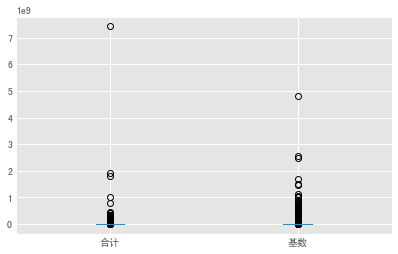

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
data_1 = {'合计': combine_df['保险实缴/人数'], '基数': combine_df['基数/人数'], }
data_1 = pd.DataFrame(data_1)
data_1.info()
X_train, X_test, Y_train, Y_test = train_test_split(
    data_1.iloc[:, :1], data_1['基数'], train_size=.80)
model = LinearRegression()
model.fit(X_train, Y_train)
a1 = model.intercept_
b1 = model.coef_
print("最佳拟合线:截距", a1, ",回归系数：", b1)
score = model.score(X_test, Y_test)
print("回归得分:", score)
data_1.corr()
# 箱形图
plt.style.use("ggplot")
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.boxplot(x=data_1.values, labels=data_1.columns, whis=1.5)
plt.show()

In [72]:
combine_df['保险实缴/人数'].describe()

count    2.412000e+03
mean     1.018326e+07
std      1.651760e+08
min      0.000000e+00
25%      8.994061e+03
50%      1.563872e+04
75%      3.112959e+04
max      7.415916e+09
Name: 保险实缴/人数, dtype: float64

In [73]:
combine_df['基数/人数'].describe()

count    2.412000e+03
mean     1.813158e+07
std      1.587298e+08
min      0.000000e+00
25%      5.983107e+03
50%      3.823452e+04
75%      7.774641e+04
max      4.818387e+09
Name: 基数/人数, dtype: float64

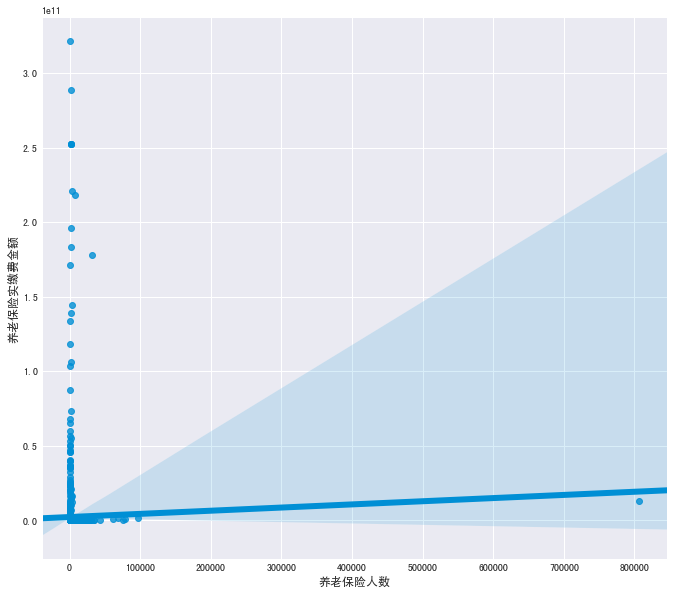

In [300]:
# combine_df['保险实缴费金额/人数'] = combine_df['保险实缴费金额/人数'].replace(np.inf, np.nan)
# combine_df['保险实缴费金额/人数']
# fig, ax = plt.subplots(figsize=(10, 10))
# sns.distplot(combine_df['养老保险人数'], bins=20, ax=ax, color='r')
# # distplot: 带分布形态的直方图, bins: 直方图数量
# sns.kdeplot(combine_df['养老保险人数'], shade=True, ax=ax)
# kdeplot: 核密度估计(kernel density estimation)
# sns.regplot(x='养老保险人数', y='养老保险实缴费金额', data=combine_df, ax=ax)  # 线性回归关系